# Tarea 1 Aplicaciones de la matemática a la ingeniería.

## Versión Jupyter Notebook.

Se importan las librerías necesarias.

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from itertools import combinations # Scatterplot

Se leen y muestran los datos:

In [157]:
path = "column_2C.txt"
names_columns = [
          "incidencia pélvica",
          "inclinación pélvica",
          "ángulo de lordosis lumbar", 
          "pendiente sacra", 
          "radio pélvico",
          "grado de espondilolistesis",
          "status"]
# Read the text file and create a data frame
df = pd.read_csv(path, header=None, sep=" ", names=names_columns)
# Print the data frame
df.head()

,incidencia pélvica,inclinación pélvica,ángulo de lordosis lumbar,pendiente sacra,radio pélvico,grado de espondilolistesis,status
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


In [158]:
type(df)

pandas.core.frame.DataFrame

In [159]:
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   incidencia pélvica          310 non-null    float64
 1   inclinación pélvica         310 non-null    float64
 2   ángulo de lordosis lumbar   310 non-null    float64
 3   pendiente sacra             310 non-null    float64
 4   radio pélvico               310 non-null    float64
 5   grado de espondilolistesis  310 non-null    float64
 6   status                      310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


Notese que no existen datos faltantes.

**<span style="color:red">a.</span>** ¿Cuántas observaciones hay en el conjunto de datos? ¿Cuántas observaciones corresponden a cada etiqueta?

In [160]:
df["status"].value_counts()

AB    210
NO    100
Name: status, dtype: int64

`Respuesta`: 
- En total hay 310 observaciones.
- Hay 210 observaciones en la etiqueta "AB" y 100 en las observaciones en la etiqueta "NO".

**<span style="color:red">b.</span>** Realice histogramas para cada una de las covariables (separando las observaciones corresponden a cada etiqueta). Además, reporte medidas de tendencia central, dispersión y forma.

Comente los resultados.

In [161]:
for status in pd.unique(df['status']):
    print(f'Medidas de tendencia central, dispersión y forma para: {status}')
    temp = df[df['status']==status].drop(['status'], axis=1)
    info = temp.describe().T
    info['skew'] = temp.skew()
    info['curtosis'] = temp.kurt()
    display(info)

Medidas de tendencia central, dispersión y forma para: AB


,count,mean,std,min,25%,50%,75%,max,skew,curtosis
incidencia pélvica,210.0,64.692143,17.661807,26.15,50.1050,65.275,77.5975,129.83,0.274841,0.202589
inclinación pélvica,210.0,19.791048,10.515653,-6.55,13.0475,18.795,24.8125,49.43,0.543336,0.165615
ángulo de lordosis lumbar,210.0,55.925190,19.668972,14.00,41.1175,56.150,68.1050,125.74,0.314309,-0.173225
pendiente sacra,210.0,44.901524,14.515133,13.37,34.3800,44.640,55.1425,121.43,0.650361,2.754752
radio pélvico,210.0,115.077381,14.090965,70.08,107.3075,115.650,123.1350,163.07,0.111110,1.034906
grado de espondilolistesis,210.0,37.777571,40.696738,-10.68,7.2600,31.945,55.3750,418.54,4.274374,35.952586


Medidas de tendencia central, dispersión y forma para: NO


,count,mean,std,min,25%,50%,75%,max,skew,curtosis
incidencia pélvica,100.0,51.6856,12.367900,30.74,42.8200,50.125,61.4725,89.83,0.747352,0.495784
inclinación pélvica,100.0,12.8218,6.778658,-5.85,8.8025,13.485,16.7875,29.89,-0.194265,0.189884
ángulo de lordosis lumbar,100.0,43.5423,12.361581,19.07,35.0000,42.640,51.6025,90.56,0.750793,1.220533
pendiente sacra,100.0,38.8638,9.623776,17.39,32.3425,37.060,44.6050,67.20,0.431472,0.125237
radio pélvico,100.0,123.8912,9.013755,100.50,118.1800,123.875,129.0400,147.89,0.010833,0.117276
grado de espondilolistesis,100.0,2.1870,6.307020,-11.06,-1.5100,1.155,4.9675,31.17,1.691499,5.596433


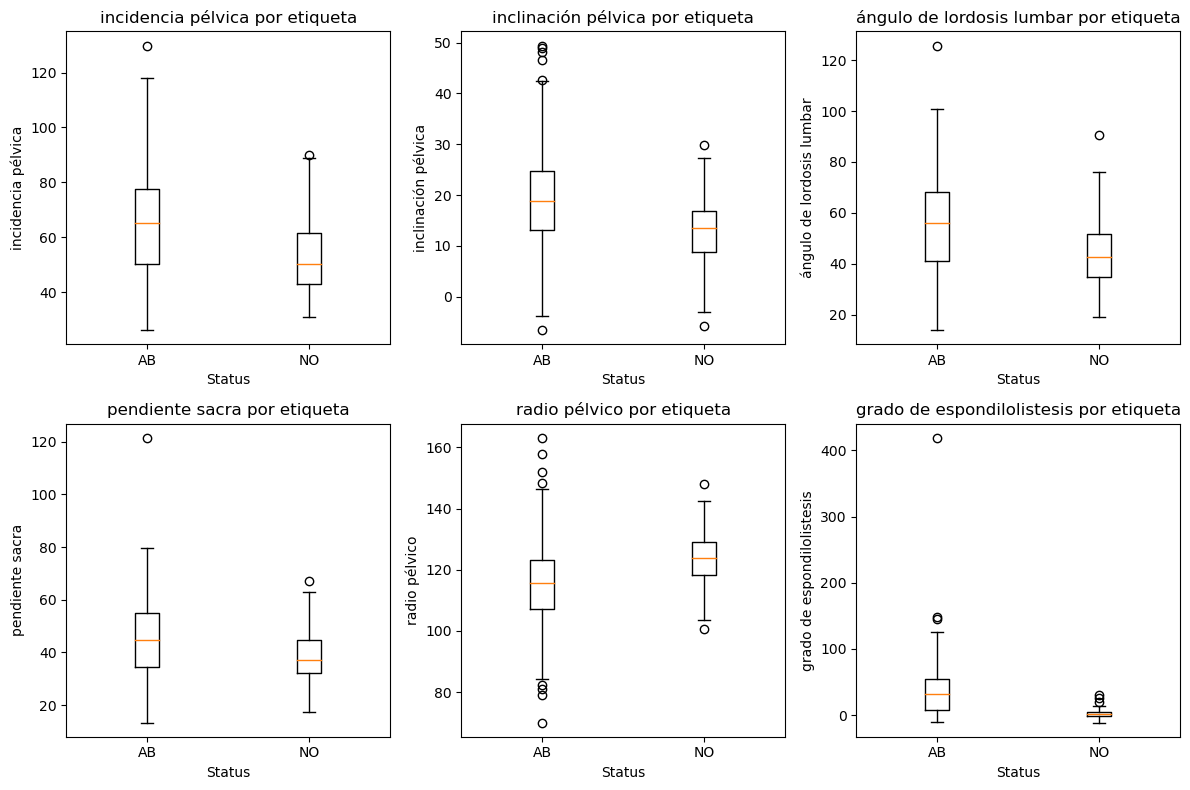

In [162]:
# Obtener las etiquetas únicas de la columna 'Label'
unique_labels = df["status"].unique()

# Calcular el número de filas y columnas en la matriz de subplots
num_rows = 2
num_cols = 3

# Crear subplots con la matriz de disposición
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)  # Espacio vertical entre subplots

# Iterar a través de las columnas y subplots
for i, column in enumerate(df.columns[:-1]):  # Excluye la última columna (etiqueta)
    row = i // num_cols
    col = i % num_cols
    
    ax = axes[row, col]
    
    # Crear boxplots separados por etiquetas
    data = [df[df["status"] == label][column] for label in unique_labels]
    ax.boxplot(data, labels=unique_labels)
    
    ax.set_xlabel("Status")
    ax.set_ylabel(column)
    ax.set_title(f'{column} por etiqueta')

# Ajustar el espacio entre subplots para evitar superposiciones
plt.tight_layout()

# Mostrar los subplots
plt.show()

- Se observa que en terminos generales el grupo "AB" posee una desviación estandar más alta en todas las carácteristicas.
- En esto se nota que "grado de espondilolistesis" representa una gran diferencia entre un grupo y otro respecto a la desviación estandar y principalmente en que toma valores muy altos para "AB".
- Como regla general parece ser que "AB" posee valores más altos en sus carácteristicas respecto a "NO" salvo talvez en "radio pélvico".
- Por simple inspección no se descarta que las distribuciones no sean normales, a excepción de "grado de espondilolistesis".

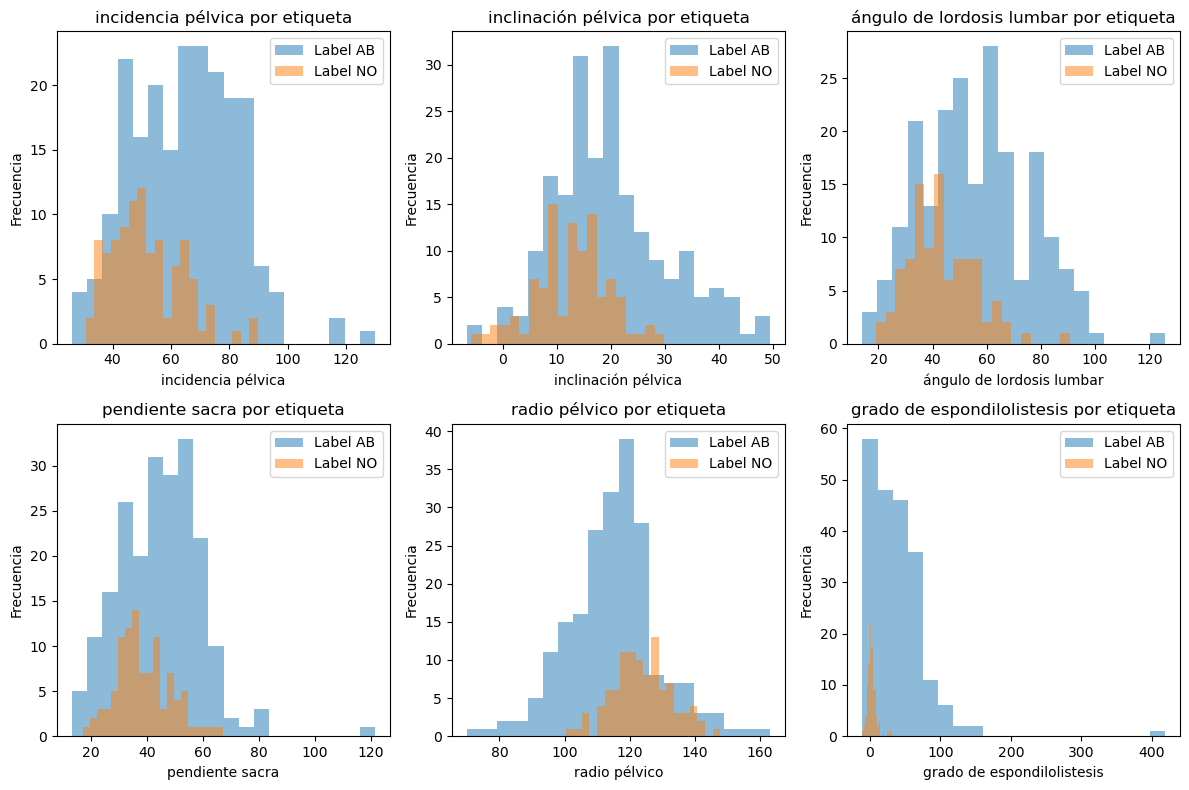

In [163]:
# Obtener las etiquetas únicas de la columna 'Label'
unique_labels = df["status"].unique()

# Calcular el número de filas y columnas en la matriz de subplots
num_rows = 2
num_cols = 3

# Crear subplots con la matriz de disposición
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)  # Espacio vertical entre subplots

# Iterar a través de las columnas y subplots
for i, column in enumerate(df.columns[:-1]):  # Excluye la última columna (etiqueta)
    row = i // num_cols
    col = i % num_cols
    
    ax = axes[row, col]
    
    for label in unique_labels:
        data_label = df[df["status"] == label][column]
        ax.hist(data_label, bins=20, alpha=0.5, label=f'Label {label}')
    
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')
    ax.set_title(f'{column} por etiqueta')
    ax.legend()

# Ajustar el espacio entre subplots para evitar superposiciones
plt.tight_layout()

# Mostrar los subplots
plt.show()


Con los gráficos se refuerza la hipótesis de normalidad expresada en el último punto, además en conjunto con el análisis de las medidas de tendencia central se puede intuir que las distribuciones por parecidas que parezcan pueden diferir en su media.

**<span style="color:red">c.</span>** Para diferentes parejas de covariables, reporte los gráficos de dispersión (es decir, grafique $X_i$
versus $X_j$) usando diferentes colores/símbolos de acuerdo a las distintas etiquetas. Comente los
patrones que observa en estos gráficos.

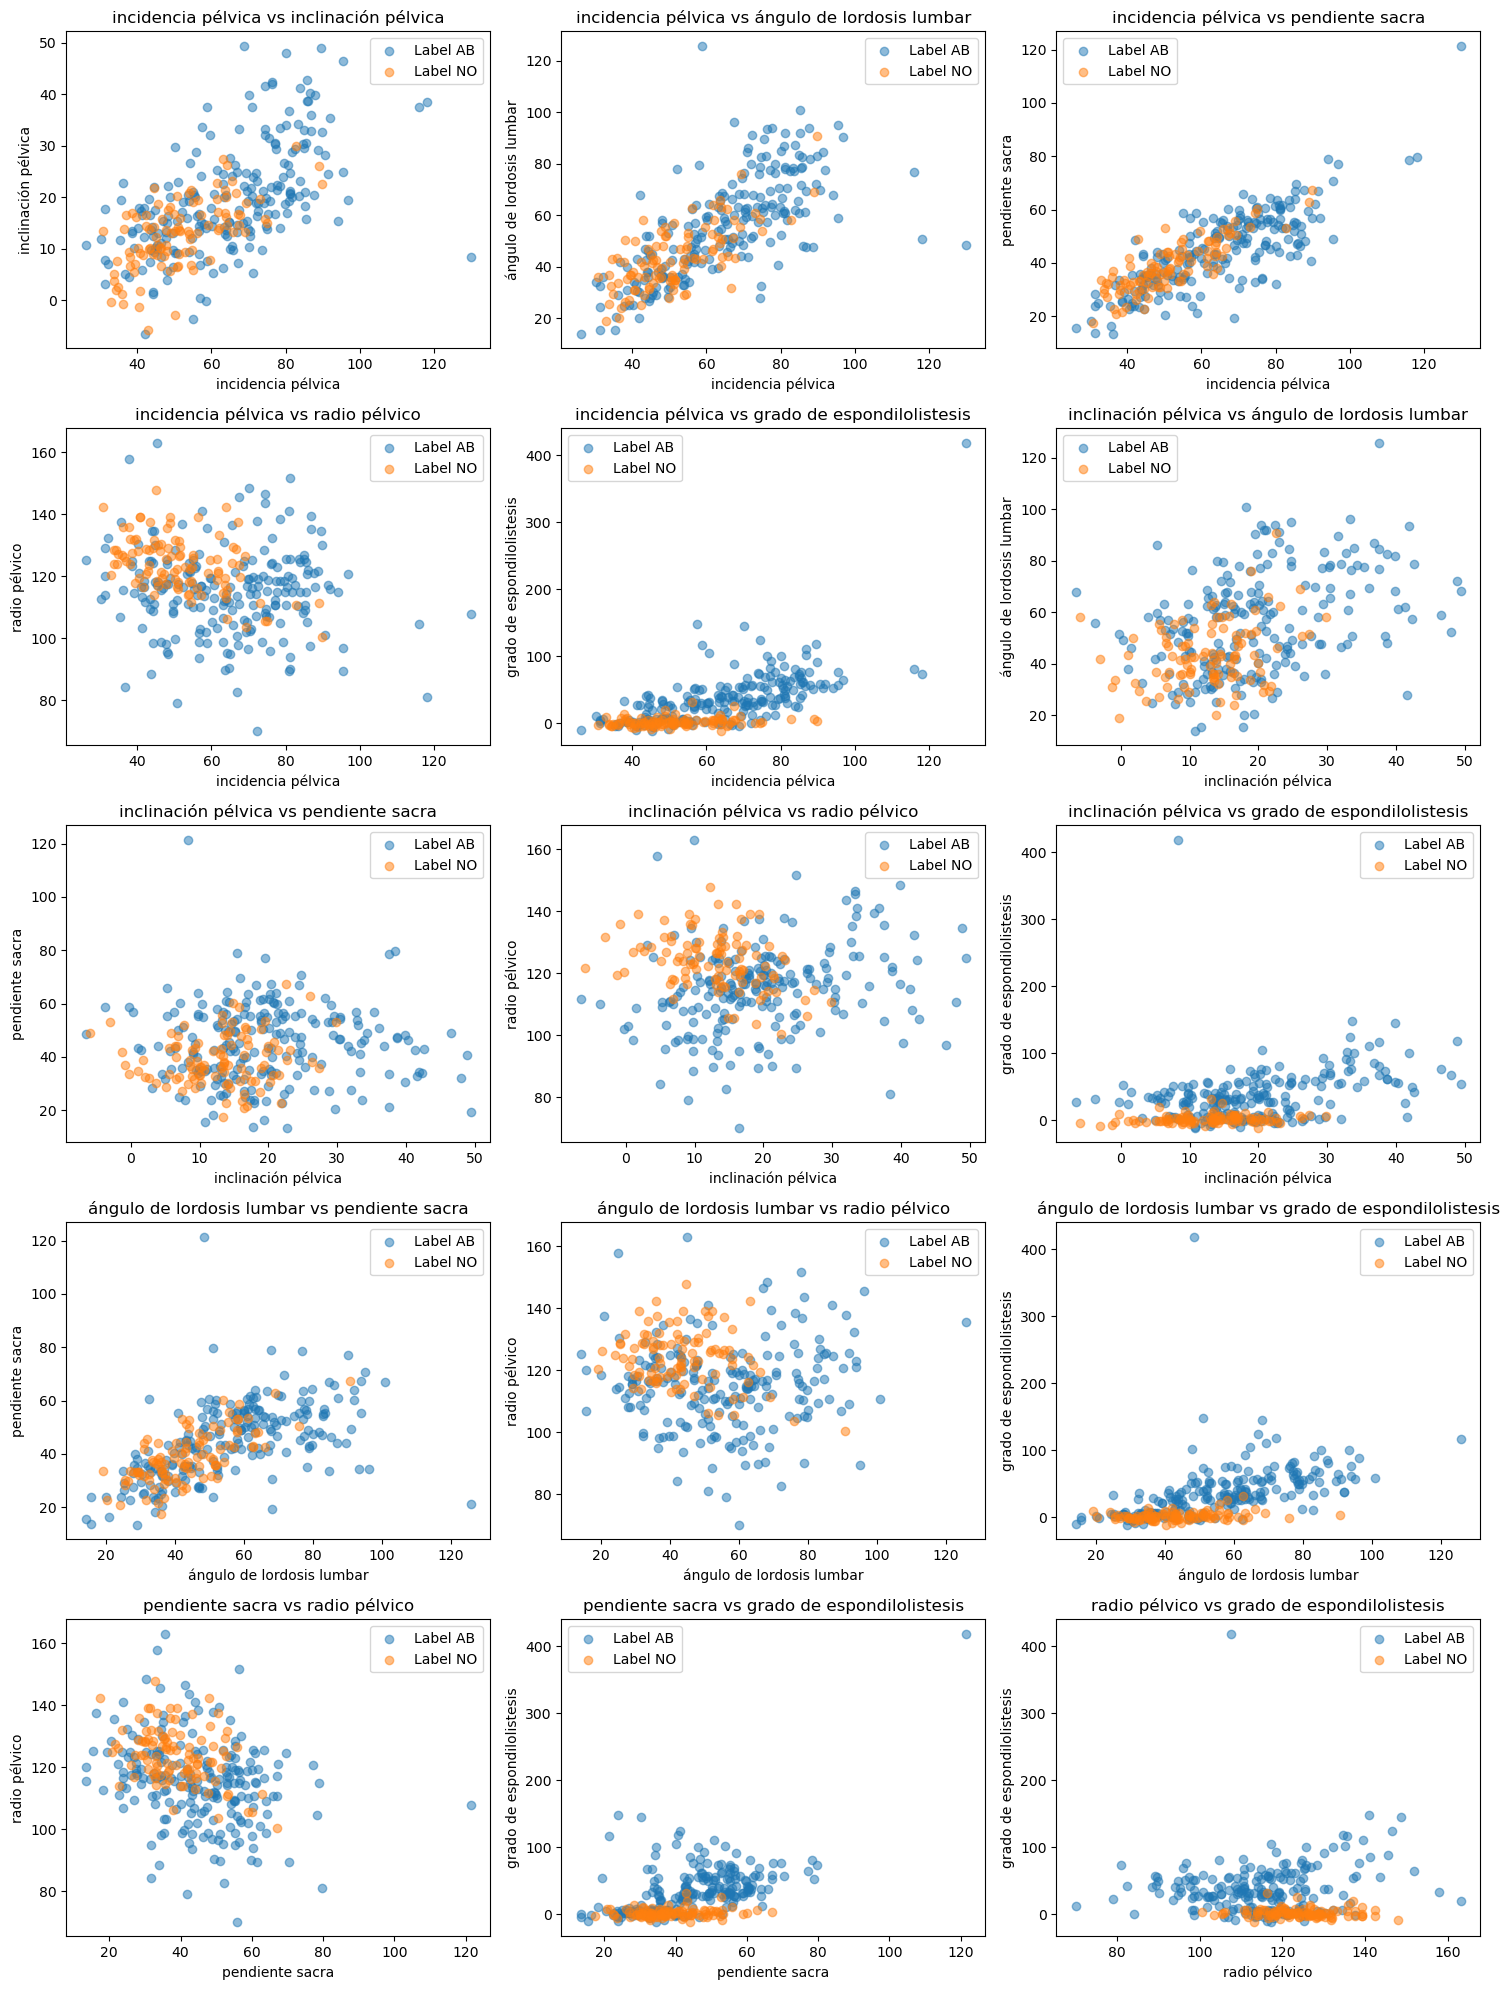

In [164]:
# Calcular el número de filas y columnas en la matriz de subplots
num_rows = 5
num_cols = 3

# Crear subplots con la matriz de disposición
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)  # Espacio vertical entre subplots

# Generar todas las combinaciones posibles de pares de covariables
covariables = df.columns[:-1]  # Excluye la última columna (etiqueta)
covar_combinations = list(combinations(covariables, 2))

# Iterar a través de las combinaciones y subplots
for i, (x_col, y_col) in enumerate(covar_combinations):
    row = i // num_cols
    col = i % num_cols
    
    ax = axes[row, col]
    
    # Crear scatterplot separado por etiquetas
    for label in unique_labels:
        data_x = df[df["status"] == label][x_col]
        data_y = df[df["status"] == label][y_col]
        ax.scatter(data_x, data_y, label=f'Label {label}', alpha=0.5)
    
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f'{x_col} vs {y_col}')
    ax.legend()

# Ajustar el espacio entre subplots para evitar superposiciones
plt.tight_layout()

# Mostrar los subplots
plt.show()


- Observando los primeros 3 gráficos (izquierda a derecha) se puede observar cierta relación proporcional que puede indicar una fuerte correlación que se estudiará con heatmap.
- Por la diferencia de magnitud entre los "grados de espondilolistesis" de los grupos "AB" y "NO" no se puede observar si existe o no algún tipo de relación para los grupos "AB" en dicha carácteristica respecto al resto.

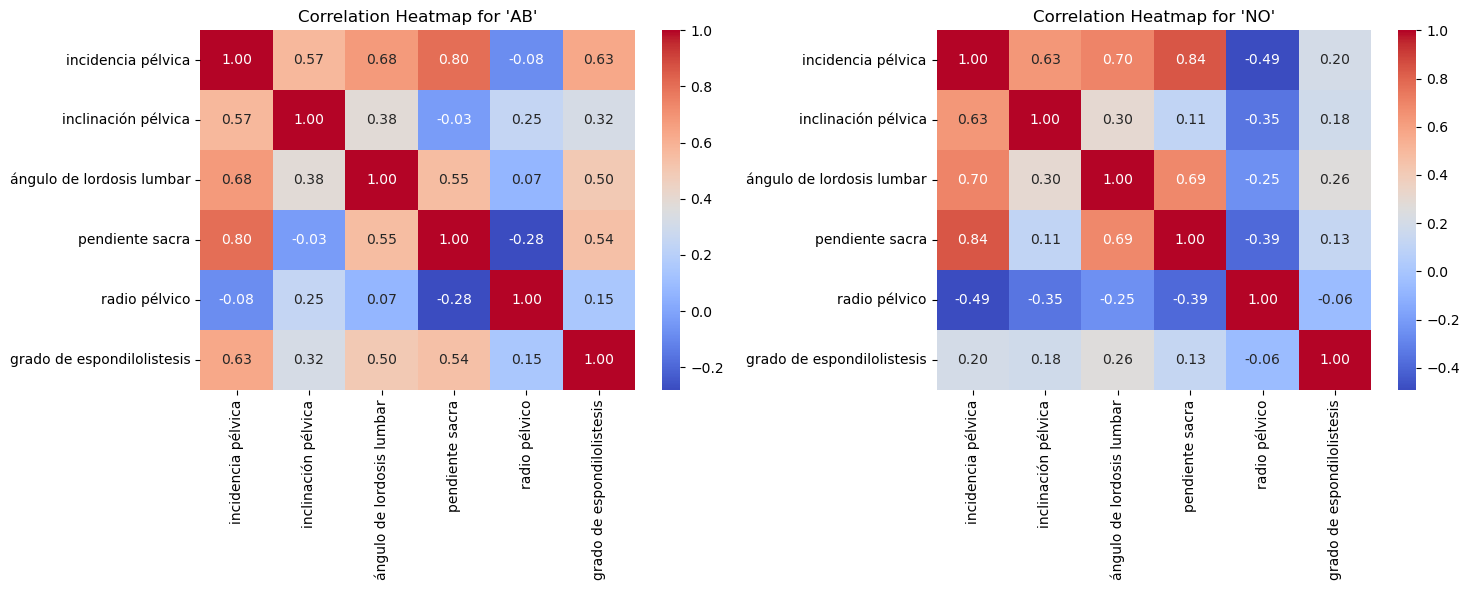

In [167]:
# Separate data based on unique 'status' values
unique_statuses = df['status'].unique()

# Create a DataFrame without the 'status' column
temp = df.drop(['status'], axis=1)

# Calculate correlation matrices for each 'status' value
correlation_matrices = {}
for status in unique_statuses:
    status_data = temp[df['status'] == status]
    correlation_matrix = status_data.corr()
    correlation_matrices[status] = correlation_matrix

# Create a 1x2 grid for the correlation heatmaps
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot correlation heatmaps for each 'status'
for i, (status, correlation_matrix) in enumerate(correlation_matrices.items()):
    ax = axes[i]
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
    ax.set_title(f"Correlation Heatmap for '{status}'")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



Note que las hipótesis fueron correctas, existen datos fuertemente correlaciones como por ejemplo "pendiente sacra" y "incidencia pélvica" entre otros, lo cuál puede suponer problemas para modelos que trabajen bajo supuestos de independencia y puede motivar a la eliminación de carácteristicas para disminuir el riesgo de colinealidad o bien el uso de métodos de reducción de dimensionalidad.

Desde un análisis de datos, se recalca que en el grupo "AB" existe una correlación moderada de "grado de espondilolistesis" con respecto al resto de variables, la cual no se ve presente en el grupo "NO".

Estos casos mencionados no son los únicos, estas dos carácteristicas se repiten para otros features, notese el caso del "radio pélvico" cono "incidencia pélvica".

**<span style="color:red">d.</span>**